# Telecom Churn Case Study
## objective
### 1. to  identify to retain high profitable customers
### 2. to predict which customers are at high risk of churn
### 3. to identify the important features for churn
### 4. to recommend strategies to manage customer churn

## import libraries and read data

In [64]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
churn_data = pd.read_csv("telecom_churn_data.csv", encoding = "ISO-8859-1",low_memory= False)
pd.set_option('display.max_columns', 233)
pd.set_option('display.max_columns', 233)
churn_data.head()


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [66]:
churn_data.info()
churn_data.shape
churn_data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

## mobile no and circle id colums are unnecessary for our study so dropping them

In [67]:
churn_data = churn_data.drop(['mobile_number','circle_id'], axis=1)

## Data cleaning
### handling missing values

In [68]:
# Adding up the missing values (column-wise)
churn_data.isnull().sum()
percent_missing=round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)
print(percent_missing)

loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
                        ... 
aon                     0.00
aug_vbc_3g              0.00
jul_vbc_3g              0.00
jun_vbc_3g              0.00
sep_vbc_3g              0.00
Length: 224, dtype: float64


## categorical columns and missing value percentage in them

In [69]:
churn_data_categorical = churn_data.select_dtypes(include='object')
churn_data_categorical.info()
churn_data_categorical.describe()
print(round(100*(churn_data_categorical.isnull().sum()/len(churn_data.index)), 2))
churn_data_categorical=list(churn_data_categorical)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   last_date_of_month_6      99999 non-null  object
 1   last_date_of_month_7      99398 non-null  object
 2   last_date_of_month_8      98899 non-null  object
 3   last_date_of_month_9      98340 non-null  object
 4   date_of_last_rech_6       98392 non-null  object
 5   date_of_last_rech_7       98232 non-null  object
 6   date_of_last_rech_8       96377 non-null  object
 7   date_of_last_rech_9       95239 non-null  object
 8   date_of_last_rech_data_6  25153 non-null  object
 9   date_of_last_rech_data_7  25571 non-null  object
 10  date_of_last_rech_data_8  26339 non-null  object
 11  date_of_last_rech_data_9  25922 non-null  object
dtypes: object(12)
memory usage: 9.2+ MB
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8      

In [70]:
churn_data=churn_data.drop(churn_data_categorical ,axis=1)
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 212 entries, loc_og_t2o_mou to sep_vbc_3g
dtypes: float64(179), int64(33)
memory usage: 161.7 MB


In [71]:
percent_missing=round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)

## missing values more than 70 percent

In [72]:
print(percent_missing.loc[percent_missing >70])

total_rech_data_6     74.85
total_rech_data_7     74.43
total_rech_data_8     73.66
total_rech_data_9     74.08
max_rech_data_6       74.85
max_rech_data_7       74.43
max_rech_data_8       73.66
max_rech_data_9       74.08
count_rech_2g_6       74.85
count_rech_2g_7       74.43
count_rech_2g_8       73.66
count_rech_2g_9       74.08
count_rech_3g_6       74.85
count_rech_3g_7       74.43
count_rech_3g_8       73.66
count_rech_3g_9       74.08
av_rech_amt_data_6    74.85
av_rech_amt_data_7    74.43
av_rech_amt_data_8    73.66
av_rech_amt_data_9    74.08
arpu_3g_6             74.85
arpu_3g_7             74.43
arpu_3g_8             73.66
arpu_3g_9             74.08
arpu_2g_6             74.85
arpu_2g_7             74.43
arpu_2g_8             73.66
arpu_2g_9             74.08
night_pck_user_6      74.85
night_pck_user_7      74.43
night_pck_user_8      73.66
night_pck_user_9      74.08
fb_user_6             74.85
fb_user_7             74.43
fb_user_8             73.66
fb_user_9           

## from above result we can see a pattern that a group of columns have same no of missing values
### identify these clumns

In [73]:
print(percent_missing.loc[percent_missing == 74.85])
print(percent_missing.loc[percent_missing == 74.43])
print(percent_missing.loc[percent_missing == 73.66])
print(percent_missing.loc[percent_missing == 74.08])

total_rech_data_6     74.85
max_rech_data_6       74.85
count_rech_2g_6       74.85
count_rech_3g_6       74.85
av_rech_amt_data_6    74.85
arpu_3g_6             74.85
arpu_2g_6             74.85
night_pck_user_6      74.85
fb_user_6             74.85
dtype: float64
total_rech_data_7     74.43
max_rech_data_7       74.43
count_rech_2g_7       74.43
count_rech_3g_7       74.43
av_rech_amt_data_7    74.43
arpu_3g_7             74.43
arpu_2g_7             74.43
night_pck_user_7      74.43
fb_user_7             74.43
dtype: float64
total_rech_data_8     73.66
max_rech_data_8       73.66
count_rech_2g_8       73.66
count_rech_3g_8       73.66
av_rech_amt_data_8    73.66
arpu_3g_8             73.66
arpu_2g_8             73.66
night_pck_user_8      73.66
fb_user_8             73.66
dtype: float64
total_rech_data_9     74.08
max_rech_data_9       74.08
count_rech_2g_9       74.08
count_rech_3g_9       74.08
av_rech_amt_data_9    74.08
arpu_3g_9             74.08
arpu_2g_9             74.08
nig

### we can conclude from missing values in these columns that there <br> was no recharge that month so all the variable are zero

In [74]:
zero_recharge= list(percent_missing.loc[percent_missing >70].index)



### imputing these missing values with 0

In [75]:
churn_data[zero_recharge] = churn_data[zero_recharge].apply(lambda x: x.fillna(0))

In [76]:
churn_data.isnull().sum()
percent_missing=round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)
print(percent_missing)

loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
arpu_6            0.00
arpu_7            0.00
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 212, dtype: float64


In [77]:
percent_missing=round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)
print(percent_missing)
print(percent_missing.loc[percent_missing >2])

print(percent_missing.loc[percent_missing ==3.94])
print(percent_missing.loc[percent_missing ==3.86])
print(percent_missing.loc[percent_missing ==5.38])
print(percent_missing.loc[percent_missing ==7.75])



loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
arpu_6            0.00
arpu_7            0.00
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 212, dtype: float64
onnet_mou_6     3.94
onnet_mou_7     3.86
onnet_mou_8     5.38
onnet_mou_9     7.75
offnet_mou_6    3.94
                ... 
isd_ic_mou_9    7.75
ic_others_6     3.94
ic_others_7     3.86
ic_others_8     5.38
ic_others_9     7.75
Length: 116, dtype: float64
onnet_mou_6         3.94
offnet_mou_6        3.94
roam_ic_mou_6       3.94
roam_og_mou_6       3.94
loc_og_t2t_mou_6    3.94
loc_og_t2m_mou_6    3.94
loc_og_t2f_mou_6    3.94
loc_og_t2c_mou_6    3.94
loc_og_mou_6        3.94
std_og_t2t_mou_6    3.94
std_og_t2m_mou_6    3.94
std_og_t2f_mou_6    3.94
std_og_t2c_mou_6    3.94
std_og_mou_6        3.94
isd_og_mou_6        3.94
spl_og_mou_6        3.94
og_others_6         3.94
loc_ic_t2t_mou_6    3.94
loc_ic_t2m

In [78]:
missingcol = list(percent_missing.loc[percent_missing >2].index)
print(missingcol)

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'st

In [79]:
churn_data[missingcol] = churn_data[missingcol].apply(lambda x: x.fillna(0))

In [80]:
percent_missing=round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)
print(percent_missing)

loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
arpu_6            0.00
arpu_7            0.00
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 212, dtype: float64


In [81]:

print(percent_missing.loc[percent_missing >0])

loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
dtype: float64


In [82]:
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']
for i in col:
   print(churn_data[i].unique())

[ 0. nan]
[ 0. nan]
[ 0. nan]


In [83]:
for i in col:
    churn_data[i].fillna(churn_data[i].mode()[0], inplace=True)
    

## dropping columns with 99% skewness

In [84]:
skew_cols=[i for i in (churn_data)if(churn_data[i].value_counts().max() >= 98999)]
skew_cols
churn_data.drop(skew_cols, axis = 1, inplace = True)
churn_data.shape
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 194 entries, arpu_6 to sep_vbc_3g
dtypes: float64(161), int64(33)
memory usage: 148.0 MB


## now checking the missing values

In [85]:
percent_missing=round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)
print(percent_missing)
churn_data.shape

arpu_6         0.0
arpu_7         0.0
arpu_8         0.0
arpu_9         0.0
onnet_mou_6    0.0
              ... 
aon            0.0
aug_vbc_3g     0.0
jul_vbc_3g     0.0
jun_vbc_3g     0.0
sep_vbc_3g     0.0
Length: 194, dtype: float64


(99999, 194)

## deriving new variables
### 1. rename variable to more clarity


In [86]:
churn_data.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

### deriving new varibles and dropping old variables

In [87]:
churn_data['vol_data_mb_6'] = (churn_data['vol_2g_mb_6']+churn_data['vol_3g_mb_6']).astype(int)
churn_data['vol_data_mb_7'] = (churn_data['vol_2g_mb_7']+churn_data['vol_3g_mb_7']).astype(int)
churn_data['vol_data_mb_8'] = (churn_data['vol_2g_mb_8']+churn_data['vol_3g_mb_8']).astype(int)
churn_data['vol_data_mb_9'] = (churn_data['vol_2g_mb_9']+churn_data['vol_3g_mb_9']).astype(int)
churn_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 198 columns):
 #   Column              Dtype  
---  ------              -----  
 0   arpu_6              float64
 1   arpu_7              float64
 2   arpu_8              float64
 3   arpu_9              float64
 4   onnet_mou_6         float64
 5   onnet_mou_7         float64
 6   onnet_mou_8         float64
 7   onnet_mou_9         float64
 8   offnet_mou_6        float64
 9   offnet_mou_7        float64
 10  offnet_mou_8        float64
 11  offnet_mou_9        float64
 12  roam_ic_mou_6       float64
 13  roam_ic_mou_7       float64
 14  roam_ic_mou_8       float64
 15  roam_ic_mou_9       float64
 16  roam_og_mou_6       float64
 17  roam_og_mou_7       float64
 18  roam_og_mou_8       float64
 19  roam_og_mou_9       float64
 20  loc_og_t2t_mou_6    float64
 21  loc_og_t2t_mou_7    float64
 22  loc_og_t2t_mou_8    float64
 23  loc_og_t2t_mou_9    float64
 24  loc_og_t2m_mou_6    float64

In [88]:
churn_data.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_2g_mb_9',
                'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','vol_3g_mb_9'], axis=1, inplace=True)

In [89]:
churn_data['arpu_data_6'] = (churn_data['arpu_2g_6']+churn_data['arpu_3g_6']).astype(int)
churn_data['arpu_data_7'] = (churn_data['arpu_2g_7']+churn_data['arpu_3g_7']).astype(int)
churn_data['arpu_data_8'] = (churn_data['arpu_2g_8']+churn_data['arpu_3g_8']).astype(int)
churn_data['arpu_data_9'] = (churn_data['arpu_2g_9']+churn_data['arpu_3g_9']).astype(int)
churn_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 194 columns):
 #   Column              Dtype  
---  ------              -----  
 0   arpu_6              float64
 1   arpu_7              float64
 2   arpu_8              float64
 3   arpu_9              float64
 4   onnet_mou_6         float64
 5   onnet_mou_7         float64
 6   onnet_mou_8         float64
 7   onnet_mou_9         float64
 8   offnet_mou_6        float64
 9   offnet_mou_7        float64
 10  offnet_mou_8        float64
 11  offnet_mou_9        float64
 12  roam_ic_mou_6       float64
 13  roam_ic_mou_7       float64
 14  roam_ic_mou_8       float64
 15  roam_ic_mou_9       float64
 16  roam_og_mou_6       float64
 17  roam_og_mou_7       float64
 18  roam_og_mou_8       float64
 19  roam_og_mou_9       float64
 20  loc_og_t2t_mou_6    float64
 21  loc_og_t2t_mou_7    float64
 22  loc_og_t2t_mou_8    float64
 23  loc_og_t2t_mou_9    float64
 24  loc_og_t2m_mou_6    float64

In [90]:
churn_data.drop(['arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9',
                'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9'], axis=1, inplace=True)

In [91]:
churn_data['total_rech_num_data_6'] = (churn_data['count_rech_2g_6']+churn_data['count_rech_3g_6']).astype(int)
churn_data['total_rech_num_data_7'] = (churn_data['count_rech_2g_7']+churn_data['count_rech_3g_7']).astype(int)
churn_data['total_rech_num_data_8'] = (churn_data['count_rech_2g_8']+churn_data['count_rech_3g_8']).astype(int)
churn_data['total_rech_num_data_9'] = (churn_data['count_rech_2g_9']+churn_data['count_rech_3g_9']).astype(int)

In [92]:
churn_data.drop(['count_rech_2g_6','count_rech_2g_7','count_rech_3g_6','count_rech_3g_7',
                'count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9'], axis=1, inplace=True)

In [93]:
churn_data['total_rech_amt_data_6'] = churn_data['total_rech_num_data_6']*churn_data['av_rech_amt_data_6']
churn_data['total_rech_amt_data_7'] = churn_data['total_rech_num_data_7']*churn_data['av_rech_amt_data_7']
churn_data['total_rech_amt_data_8'] = churn_data['total_rech_num_data_8']*churn_data['av_rech_amt_data_8']
churn_data['total_rech_amt_data_9'] = churn_data['total_rech_num_data_9']*churn_data['av_rech_amt_data_9']

In [94]:
churn_data.drop(['total_rech_num_data_6','total_rech_num_data_7','total_rech_num_data_8','total_rech_num_data_9',
                'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'], axis=1, inplace=True)

In [95]:
churn_data['total_month_rech_6'] = churn_data['total_rech_amt_6']+churn_data['total_rech_amt_data_6']
churn_data['total_month_rech_7'] = churn_data['total_rech_amt_7']+churn_data['total_rech_amt_data_7']
churn_data['total_month_rech_8'] = churn_data['total_rech_amt_8']+churn_data['total_rech_amt_data_8']
churn_data['total_month_rech_9'] = churn_data['total_rech_amt_9']+churn_data['total_rech_amt_data_9']

## identifying and filtering high value customers

In [96]:
churn_data['avg_6_7'] =(churn_data.total_month_rech_6 + churn_data.total_month_rech_7)/2
# finding the cutoff which is the 70th percentile 
hv_cutoff= np.percentile(churn_data['avg_6_7'],70)
# Filtering the users whose good phase avg. recharge amount >= to the cutoff of 70th percentile.
churn_data = churn_data[churn_data['avg_6_7'] >=hv_cutoff]
churn_data.shape

(30001, 183)

## tagging churn with 1 and nonchurn with 0

In [97]:
churn_data['total_calls_mou_9'] = churn_data.total_ic_mou_9 + churn_data.total_og_mou_9

In [98]:
churn_data['churn'] = churn_data.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.vol_data_mb_9 == 0) else 0, axis=1)



### churn ratio

In [99]:

print(churn_data.churn.value_counts()*100/churn_data.shape[0])

0    91.846938
1     8.153062
Name: churn, dtype: float64


##### we get highly imbalanced data which we'll treat later

### we dont need 9th month data for prediction as it is churn phase

In [100]:
drop_cols = [i for i in churn_data.columns if '_9' in i]
print(drop_cols)

churn_data.drop(drop_cols, axis=1, inplace=True)

churn_data.shape

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9', 'vol_data_mb_9', 'arpu_data_9', 'total_rech_amt_data_9', 'total_month_rech_9', 'total_calls_mou_9']


(30001, 139)

In [101]:
churn_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 139 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   arpu_6                 float64
 1   arpu_7                 float64
 2   arpu_8                 float64
 3   onnet_mou_6            float64
 4   onnet_mou_7            float64
 5   onnet_mou_8            float64
 6   offnet_mou_6           float64
 7   offnet_mou_7           float64
 8   offnet_mou_8           float64
 9   roam_ic_mou_6          float64
 10  roam_ic_mou_7          float64
 11  roam_ic_mou_8          float64
 12  roam_og_mou_6          float64
 13  roam_og_mou_7          float64
 14  roam_og_mou_8          float64
 15  loc_og_t2t_mou_6       float64
 16  loc_og_t2t_mou_7       float64
 17  loc_og_t2t_mou_8       float64
 18  loc_og_t2m_mou_6       float64
 19  loc_og_t2m_mou_7       float64
 20  loc_og_t2m_mou_8       float64
 21  loc_og_t2f_mou_6       float64
 22  loc_og_t2f_mou_7     

### getting target variable y

In [102]:
y = churn_data.pop('churn')
y.head()


0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

### we took a copy of churn_data and did our analysis with this 

In [103]:
X= churn_data.copy()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 138 entries, arpu_6 to avg_6_7
dtypes: float64(107), int32(6), int64(25)
memory usage: 31.1 MB


### correlation matrix

In [104]:
corrmat = np.corrcoef(X.transpose())
corrmat
cor = X.corr().abs()
cor

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,arpu_data_6,arpu_data_7,arpu_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,avg_6_7
arpu_6,1.000000,0.671732,0.612617,0.342438,0.216136,0.186807,0.509280,0.339350,0.285100,0.126884,0.083484,0.090363,0.196086,0.143261,0.124994,0.167352,0.127683,0.123732,0.332207,0.245092,0.218150,0.139434,0.114368,0.104302,0.047680,0.010017,0.011393,0.328978,0.246204,0.223301,0.274093,0.161528,0.133795,0.301575,0.181414,0.139780,0.066751,0.053564,0.043895,0.385851,0.230380,0.182037,0.466898,0.420753,0.413504,0.122743,0.068491,0.044582,0.054782,0.554510,0.363276,0.301856,0.082855,0.062961,0.062838,0.188556,0.149218,0.124188,0.051510,0.039208,0.037365,0.181866,0.142514,0.124191,0.088103,0.061598,0.056880,0.098775,0.065714,0.062874,0.034451,0.032583,0.022957,0.125126,0.085687,0.079334,0.225987,0.169024,0.150749,0.031356,0.034186,0.011741,0.103090,0.063193,0.070653,0.016183,0.023868,0.012284,0.349709,0.136098,0.119406,0.946125,0.650611,0.603673,0.337983,0.261993,0.284518,0.266656,0.207282,0.199304,0.108914,0.175490,0.122114,0.072714,0.021877,0.025203,0.039073,0.084189,0.061430,0.158359,0.193927,0.152069,0.176436,0.081091,0.103661,0.002555,0.025233,0.017509,0.120360,0.197733,0.140312,0.041451,0.058547,0.055172,0.112462,0.122688,0.032575,0.055213,0.236888,0.108153,0.131124,0.089005,0.023731,0.003324,0.419558,0.210705,0.207462,0.368357
arpu_7,0.671732,1.000000,0.759858,0.211608,0.320818,0.270330,0.351713,0.490176,0.395668,0.092501,0.093692,0.093961,0.133520,0.179894,0.152217,0.106674,0.157926,0.135348,0.215457,0.303201,0.256019,0.112066,0.140968,0.121890,0.009198,0.040485,0.032706,0.213501,0.304529,0.255867,0.166621,0.260775,0.219911,0.203737,0.307786,0.239066,0.051743,0.070678,0.053822,0.248495,0.381714,0.305135,0.416974,0.508862,0.452315,0.067268,0.114977,0.070283,0.017885,0.365323,0.535818,0.429002,0.045888,0.076559,0.074023,0.116099,0.171756,0.144085,0.032581,0.047221,0.046059,0.109437,0.166531,0.145045,0.058637,0.084540,0.087425,0.069811,0.100087,0.091000,0.033131,0.042395,0.033291,0.087602,0.124353,0.117452,0.139868,0.212497,0.185611,0.007228,0.01

#### getting highly correlated variables(more tha 85% or less than -85%) 

In [105]:
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.85) | (cor < -0.85)].sort_values()


std_og_t2m_mou_8    offnet_mou_8             0.851078
total_og_mou_8      std_og_mou_8             0.851307
std_og_t2m_mou_7    offnet_mou_7             0.854595
avg_6_7             total_month_rech_7       0.856275
arpu_data_7         monthly_3g_7             0.857191
std_og_t2t_mou_6    onnet_mou_6              0.859409
arpu_data_8         monthly_3g_8             0.859456
std_og_t2t_mou_7    onnet_mou_7              0.860335
std_og_t2t_mou_8    onnet_mou_8              0.860668
total_ic_mou_7      loc_ic_mou_7             0.884396
total_ic_mou_8      loc_ic_mou_8             0.896211
total_ic_mou_6      loc_ic_mou_6             0.896472
sachet_2g_8         total_rech_data_8        0.900629
sachet_2g_6         total_rech_data_6        0.903875
sachet_2g_7         total_rech_data_7        0.904243
isd_og_mou_7        isd_og_mou_6             0.915247
isd_og_mou_8        isd_og_mou_6             0.918187
total_month_rech_6  total_rech_amt_data_6    0.934058
total_month_rech_7  total_re

#### dropping variables with high corr coeff

In [106]:
drop_col_list = ['arpu_6','arpu_7','arpu_8','isd_og_mou_7','total_rech_amt_data_6','total_rech_amt_data_7',
                 'total_rech_amt_data_8','isd_og_mou_7','isd_og_mou_8','sachet_2g_7','sachet_2g_8',
                 'loc_og_t2m_mou_6','onnet_mou_7','loc_ic_t2t_mou_8','loc_og_mou_7','loc_ic_mou_6','loc_ic_mou_7',
                 'loc_ic_mou_8','onnet_mou_8','arpu_data_7','arpu_data_8'
                ]

In [107]:
X.drop(drop_col_list, axis=1, inplace=True)
X.shape

(30001, 118)

## data preparation for model building

In [108]:
# importing required packages
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [109]:
scaler = StandardScaler()

### splitting the data in train and test data and scaling them

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

Xtrain = scaler.fit_transform(X_train) 
ytrain = scaler.fit_transform(y_train.values.reshape(-1,1)) 

Xtest=scaler.transform(X_test) 
ytest=scaler.transform(y_test.values.reshape(-1,1))
print(X_train.shape)
print(y_train.shape)

(21000, 118)
(21000,)


In [111]:
print(X_train.shape)
print(y_train.shape)


(21000, 118)
(21000,)


## PCA

In [112]:
pca = PCA(random_state=42)

In [113]:
pca.fit(Xtrain)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [114]:
pca.components_

array([[ 1.39097223e-01,  1.69153598e-01,  1.81342791e-01, ...,
        -6.50147120e-02, -4.99153556e-02, -7.53714495e-02],
       [ 1.76151311e-02,  9.17839948e-02,  9.71027925e-02, ...,
         1.26669665e-01,  1.21242764e-01,  1.45409553e-01],
       [ 6.80036677e-02,  5.10543425e-02,  7.35917308e-02, ...,
         1.91285632e-01,  1.67182408e-01,  2.13892815e-01],
       ...,
       [-1.64936755e-06, -3.28468168e-06,  9.73490136e-07, ...,
         9.07275089e-09, -7.87934409e-08,  6.32964270e-09],
       [ 0.00000000e+00,  8.40302060e-16, -2.83083088e-15, ...,
        -1.36551581e-01, -5.80816394e-17,  2.17092322e-01],
       [ 0.00000000e+00,  3.67179354e-16, -6.29707470e-16, ...,
        -4.67548704e-01,  1.58376545e-17,  7.43317895e-01]])

In [115]:
pca.explained_variance_ratio_

array([1.08247042e-01, 8.50698617e-02, 6.52657997e-02, 4.76616371e-02,
       4.75226172e-02, 3.24060262e-02, 3.04583678e-02, 2.83073554e-02,
       2.52005399e-02, 2.38262035e-02, 2.34161262e-02, 2.19467054e-02,
       2.14572315e-02, 1.98611236e-02, 1.89807735e-02, 1.68106935e-02,
       1.60973071e-02, 1.48343365e-02, 1.46425130e-02, 1.41697407e-02,
       1.36928342e-02, 1.32805209e-02, 1.24081503e-02, 1.22554750e-02,
       1.18779454e-02, 1.00061794e-02, 9.46097359e-03, 8.91155233e-03,
       8.81074905e-03, 8.36171405e-03, 8.10715809e-03, 7.93886787e-03,
       7.82850144e-03, 7.29179674e-03, 7.09746402e-03, 7.06769628e-03,
       6.92782788e-03, 6.77493386e-03, 6.50361539e-03, 6.35166605e-03,
       5.79105886e-03, 5.40970339e-03, 5.12161724e-03, 5.05671113e-03,
       4.97851557e-03, 4.82220558e-03, 4.54309275e-03, 4.44676991e-03,
       4.22571910e-03, 3.99302901e-03, 3.76820254e-03, 3.64384131e-03,
       3.47383940e-03, 3.38879575e-03, 3.21790484e-03, 3.11608770e-03,
      

In [116]:
import matplotlib.pyplot as plt

<BarContainer object of 118 artists>

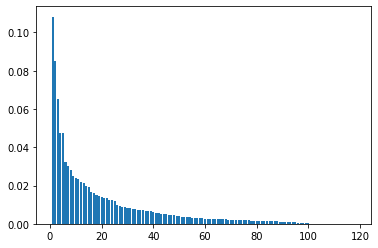

In [117]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [118]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

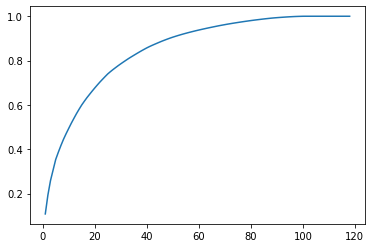

In [119]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [120]:
pc2 = PCA(n_components=40, random_state=100)

In [121]:
Xtrain_reduced = pc2.fit_transform(Xtrain)

In [122]:
y_train.value_counts()/y_train.shape

0    0.919286
1    0.080714
Name: churn, dtype: float64

In [123]:
Xtest_reduced = pc2.transform(Xtest)

In [124]:
# scaling the X variables
from sklearn.preprocessing import scale
Xtrain_reduced = scale(Xtrain_reduced)
Xtest_reduced = scale(Xtest_reduced)

#### Model Building

We have approached model building as below - 

1. High perfromance models - For building the high performance models, we have leveraged the variables transformed during the PCA phase. We have create three models under this category leveraging - 1) Support Vector Classifiers 2) Logistics Regression (regularized model) 3) XG boost 

2. Model with high interpretability - This model is built leveraging the feature space as provided in the question or as derived from the available input space

**Assumption -** 

We have considerd recall as the performance parameter for all the models due to the below - 

1. Data has high class imbalance. So, even if we predict all the customers as 'non-churn' customers we will end up with a high accuracy
2. Specificity will always be high
3. Even, the business requirement is to identify the 'Churn' customers correctly, and in doing so, if we classify some non-churns as churns it is completely fine. The idea is to not miss -out on any high value churn customers as the cost of acuiring a customer is significantly higher that cost of retaining. 

In [125]:
# importing the required packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

#### 1. High performance model1 - SVM

In [126]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specifying range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000, 10000, 100000]}

# instantiating a support vector classifier model
model = SVC(class_weight={0:0.1, 1: 0.9})

# setting up grid search scheme
# using the 5 fold CV
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)      

In [127]:
# fitting the model - it will fit 5 folds across all values of C
model_cv.fit(Xtrain_reduced,y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 28.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight={0: 0.1, 1: 0.9}, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=1)

In [128]:
# evaluating the results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,28.520117,0.305481,4.871698,0.035591,0.1,{'C': 0.1},0.663793,0.740061,0.683230,0.710843,0.718579,0.703301,0.026853,2,0.731255,0.711257,0.718135,0.730007,0.708804,0.719892,0.009295
1,21.865500,0.346693,3.457839,0.068873,1,{'C': 1},0.681034,0.767584,0.701863,0.740964,0.751366,0.728562,0.032150,1,0.820341,0.804094,0.811362,0.811445,0.812641,0.811977,0.005162
2,18.535161,0.548792,2.623233,0.405533,10,{'C': 10},0.666667,0.727829,0.698758,0.710843,0.710383,0.702896,0.020350,3,0.875278,0.871345,0.873999,0.869406,0.875847,0.873175,0.002441
3,20.112868,0.241304,2.299090,0.032382,100,{'C': 100},0.586207,0.672783,0.624224,0.662651,0.620219,0.633217,0.031278,4,0.951745,0.945906,0.949745,0.948643,0.943567,0.947921,0.002881
4,31.231788,0.667468,1.795508,0.022868,1000,{'C': 1000},0.505747,0.581040,0.484472,0.539157,0.538251,0.529733,0.032917,5,0.993318,0.991228,0.992717,0.988995,0.988713,0.990994,0.001877
5,53.741653,1.890997,1.451279,0.025517,10000,{'C': 10000},0.419540,0.474006,0.434783,0.460843,0.475410,0.452916,0.022165,6,0.999258,1.000000,1.000000,1.000000,0.999248,0.999701,0.000366
6,73.232462,2.030355,1.312508,0.019358,100000,{'C': 100000},0.356322,0.412844,0.400621,0.439759,0.442623,0.410434,0.031389,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


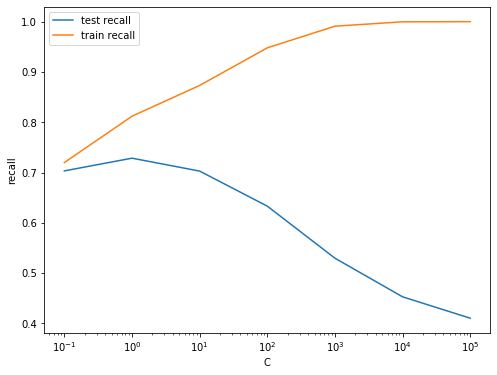

In [129]:
# plotting the tranining and test accuracies against C.
# plotting of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('recall')
plt.legend(['test recall', 'train recall'], loc='upper left')
plt.xscale('log')

from the chart, it is clear that at C = 1, we have the best test score

In [130]:
# identifying C for which the model gives best test score

best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test recall is {0} at C = {1}".format(best_score, best_C))

 The highest test recall is 0.7285623820590962 at C = 1


In [131]:
# Building model with the best value of C = 1
model2 = SVC(C=best_C, class_weight={0:0.1, 1: 0.9})

# fitting the model
model2.fit(Xtrain_reduced,y_train) 

# predicting the outcome
y_pred = model2.predict(Xtest_reduced)

In [132]:
# Evaluating the metrics
# printing the metrics

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
confusion =confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n {confusion}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')

Accuracy Score: 0.9008999000111099
Confusion Matrix: 
 [[7614  636]
 [ 256  495]]
Area Under Curve: 0.7910151313400314
Recall score: 0.6591211717709721
Precision score: 0.4376657824933687


#### 2. High performance model2 - Logistics Regression (regularized)

In [135]:
#importing the relevant package
from sklearn.linear_model import LogisticRegression

In [136]:
# initating the parameters for model regularization
# we have performed l2 regularization (ridge) as it is computationally easy to perform and it comes as default in Logstics reqression package of scikit learn
params1={"C":np.logspace(-3,3,7)}

In [137]:
# initating the logistics regression model
logreg=LogisticRegression(class_weight={0:0.1, 1: 0.9})

In [138]:
# setting up the grid search cross validation
logreg_cv = GridSearchCV(estimator = logreg, 
                        param_grid = params1, 
                        scoring= 'recall', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 

In [139]:
# fitting the model
logreg_cv.fit(Xtrain_reduced,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    2.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight={0: 0.1, 1: 0.9},
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=1)

In [140]:
# Evaluating the findings of grid search CV
cv_results_logreg = pd.DataFrame(logreg_cv.cv_results_)
cv_results_logreg.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.035213,0.012279,0.006475,0.003502,0.001,{'C': 0.001},0.660920,0.703364,0.695652,0.668675,0.642077,0.674137,0.022581,7,0.677803,0.679094,0.688274,0.694057,0.652370,0.678319,0.014290
1,0.053800,0.014561,0.008751,0.004165,0.01,{'C': 0.01},0.741379,0.792049,0.767081,0.771084,0.770492,0.768417,0.016141,6,0.779510,0.771930,0.777130,0.776229,0.763732,0.773706,0.005557
2,0.053024,0.006703,0.003251,0.003982,0.1,{'C': 0.1},0.741379,0.807339,0.776398,0.777108,0.800546,0.780554,0.023156,5,0.789903,0.775585,0.788055,0.790169,0.772009,0.783144,0.007750
3,0.054290,0.006672,0.003747,0.004668,1,{'C': 1.0},0.747126,0.810398,0.773292,0.780120,0.797814,0.781750,0.021687,3,0.789903,0.777047,0.788784,0.795304,0.772009,0.784609,0.008669
4,0.059651,0.012865,0.004808,0.006415,10,{'C': 10.0},0.747126,0.810398,0.773292,0.780120,0.797814,0.781750,0.021687,3,0.790646,0.776316,0.789512,0.795304,0.772009,0.784757,0.008970


(0.75, 1)

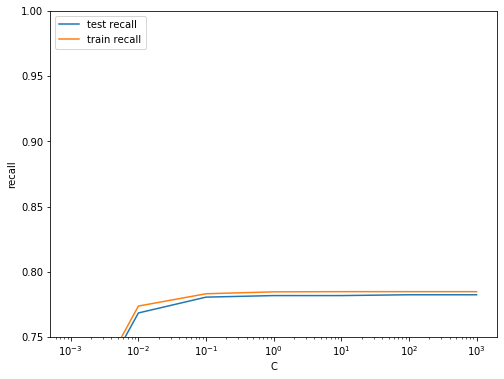

In [141]:
# plotting the tranining and test accuracies against C.
# plotting of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results_logreg['param_C'], cv_results_logreg['mean_test_score'])
plt.plot(cv_results_logreg['param_C'], cv_results_logreg['mean_train_score'])
plt.xlabel('C')
plt.ylabel('recall')
plt.legend(['test recall', 'train recall'], loc='upper left')
plt.xscale('log')
plt.ylim([0.75, 1])

from the chart it is clear that after C = 100, there is a reduction in testing score

In [142]:
# finding the best hyperparameter value
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 100.0}


In [145]:
# building the model with the best hyperparameter values
logreg2=LogisticRegression(C=100, class_weight={0:0.1, 1: 0.9})
# fitting the model
logreg2.fit(Xtrain_reduced,y_train)

# predicting the outcome
y_pred = logreg2.predict(Xtest_reduced)

In [146]:
# Evaluating the metrics
# printing the metrics

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
confusion =confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n {confusion}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')

Accuracy Score: 0.8385734918342407
Confusion Matrix: 
 [[6974 1276]
 [ 177  574]]
Area Under Curve: 0.8048237905015534
Recall score: 0.7643142476697736
Precision score: 0.31027027027027027


#### 3. High performance model3 - xgboosting

In [147]:
# importing the required packages
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline

In [148]:
# assessing the class imbalance in y_train
y_train.value_counts()/y_train.shape

0    0.919286
1    0.080714
Name: churn, dtype: float64

In [149]:
# assessing the class imbalance in y_test
y_test.value_counts()/y_test.shape

0    0.916565
1    0.083435
Name: churn, dtype: float64

In [150]:
# so, to handle class imbalance in xgboosting 
# we need to initaite the parameter scale_pos_weight = count negative examples/ count positive examples
91/8


11.375

In [151]:
# fitting model on training data with default hyperparameters
model = XGBClassifier(scale_pos_weight = 11.37)
model.fit(Xtrain_reduced,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=11.37, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [152]:
# making predcitions on the data (with default hyperparameters)
y_pred = model.predict(Xtest_reduced)

In [153]:
# Evaluating the metrics
# printing the metrics

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
confusion =confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n {confusion}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')

Accuracy Score: 0.9172314187312521
Confusion Matrix: 
 [[8090  160]
 [ 585  166]]
Area Under Curve: 0.6008223378929104
Recall score: 0.2210386151797603
Precision score: 0.50920245398773


In [154]:
# hyperparameter tuning with XGBoost

# creating a KFold object. Considered folds = 3 as a higher number would mean fitting more models, which would be computationally challenging
folds = 3

# specifying range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specifying model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200, scale_pos_weight = 11.37)

# setting up the GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      


In [155]:
# fitting the model
model_cv.fit(Xtrain_reduced,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimato...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=11.37,
                                     subsample=None, tree_method=No

In [156]:
# Evaluating the cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.863549,0.009139,0.032697,0.001913,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.782301,0.759292,0.785841,0.775811,0.011770,2,0.866372,0.849558,0.854867,0.856932,0.007018
1,2.440939,0.121166,0.031340,0.006676,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.796460,0.759292,0.792920,0.782891,0.016749,1,0.868142,0.855752,0.863717,0.862537,0.005126
2,2.604872,0.273930,0.033516,0.005466,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.780531,0.752212,0.776991,0.769912,0.012598,3,0.864602,0.858407,0.859292,0.860767,0.002736
3,1.541050,0.459413,0.026410,0.008660,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.771681,0.748673,0.762832,0.761062,0.009476,4,0.893805,0.887611,0.884956,0.888791,0.003708
4,1.503760,0.262231,0.026521,0.007478,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.755752,0.732743,0.782301,0.756932,0.020249,6,0.908850,0.892920,0.902655,0.901475,0.006556
5,2.812549,0.191701,0.036984,0.005749,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.771681,0.725664,0.785841,0.761062,0.025689,5,0.912389,0.894690,0.907080,0.904720,0.007416
6,1.762437,0.198606,0.031695,0.008977,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.672566,0.638938,0.658407,0.656637,0.013786,9,0.898230,0.890265,0.884956,0.891150,0.005455
7,2.605783,0.168207,0.034948,0.002733,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.660177,0.631858,0.690265,0.660767,0.023848,8,0.969912,0.966372,0.968142,0.968142,0.001445
8,2.888062,0.222703,0.039525,0.003137,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.679646,0.615929,0.690265,0.661947,0.032827,7,0.983186,0.976991,0.979646,0.979941,0.002538


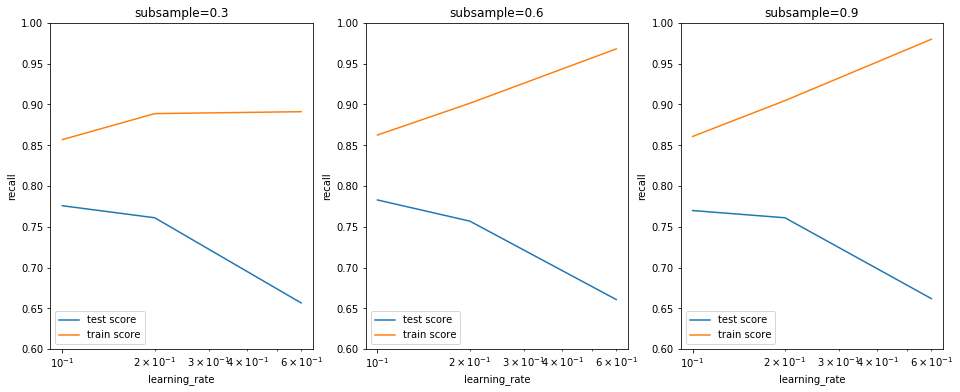

In [157]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.1, 0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('recall')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.6, 1])
    plt.legend(['test score', 'train score'], loc='lower left')
    plt.xscale('log')

#### from the charts it is clear that subsample = 0.6 and learning rate = 0.1 presents the best possible solution in the search space

In [158]:
# building the xgboost model with optimum hyperparameters as per the findings above

model = XGBClassifier(learning_rate = .1, max_depth=2, n_estimators=200, subsample = 0.6, scale_pos_weight = 11.37)
model.fit(Xtrain_reduced,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=11.37, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [159]:
# predicting y
y_pred = model.predict(Xtest_reduced)

In [160]:
# Evaluating the metrics
# printing the metrics

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
confusion =confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n {confusion}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')

Accuracy Score: 0.8467948005777136
Confusion Matrix: 
 [[7080 1170]
 [ 209  542]]
Area Under Curve: 0.7899431061614817
Recall score: 0.7217043941411452
Precision score: 0.316588785046729


#### 4. Interpretable Model - Decision Tree

In [161]:
from sklearn.tree import DecisionTreeClassifier

In [162]:
dt_default = DecisionTreeClassifier(max_depth=5, class_weight={0:0.1, 1: 0.9})
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.1, 1: 0.9},
                       criterion='gini', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [163]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      8250
           1       0.38      0.77      0.51       751

    accuracy                           0.88      9001
   macro avg       0.68      0.83      0.72      9001
weighted avg       0.93      0.88      0.89      9001



In [164]:
print(confusion_matrix(y_test,y_pred_default))

[[7312  938]
 [ 171  580]]


In [165]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(1, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight={0:0.1, 1: 0.9}, random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_gr

In [166]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.228145,0.016093,0.018667,0.003770,1,{'max_depth': 1},0.562832,0.550442,0.692035,0.601770,0.064027,17,0.609735,0.585841,0.658407,0.617994,0.030195
1,0.410764,0.005884,0.021971,0.004296,2,{'max_depth': 2},0.778761,0.775221,0.784071,0.779351,0.003637,2,0.800000,0.789381,0.773451,0.787611,0.010910
2,0.586937,0.001657,0.019825,0.003270,3,{'max_depth': 3},0.753982,0.695575,0.746903,0.732153,0.026026,6,0.800000,0.742478,0.731858,0.758112,0.029935
3,0.771732,0.003737,0.019139,0.003483,4,{'max_depth': 4},0.803540,0.738053,0.830088,0.790560,0.038678,1,0.847788,0.795575,0.840708,0.828024,0.023126
4,0.939019,0.002372,0.016009,0.000047,5,{'max_depth': 5},0.736283,0.730973,0.810619,0.759292,0.036359,4,0.826549,0.820354,0.860177,0.835693,0.017496


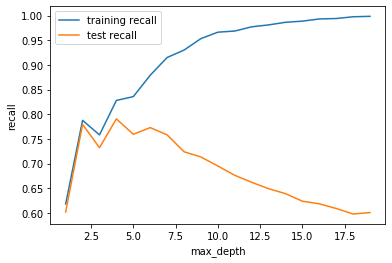

In [167]:
plt.figure()
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training recall")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test recall")
plt.xlabel("max_depth")
plt.ylabel("recall")
plt.legend()
plt.show()

In [168]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 500, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight={0:0.1, 1: 0.9}, random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_gr

In [169]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.223477,0.110014,0.020567,0.003324,5,{'min_samples_leaf': 5},0.610619,0.610619,0.667257,0.629499,0.026699,13,1.000000,1.000000,1.000000,1.000000,0.000000
1,1.843135,0.184750,0.020353,0.001625,45,{'min_samples_leaf': 45},0.787611,0.766372,0.784071,0.779351,0.009291,11,0.911504,0.900885,0.901770,0.904720,0.004811
2,1.731999,0.144543,0.019308,0.003409,85,{'min_samples_leaf': 85},0.776991,0.778761,0.801770,0.785841,0.011287,8,0.867257,0.886726,0.872566,0.875516,0.008217
3,1.618344,0.166976,0.023404,0.001848,125,{'min_samples_leaf': 125},0.775221,0.782301,0.812389,0.789971,0.016114,4,0.838053,0.850442,0.852212,0.846903,0.006299
4,1.519044,0.145964,0.018846,0.003652,165,{'min_samples_leaf': 165},0.803540,0.789381,0.785841,0.792920,0.007647,2,0.849558,0.845133,0.792035,0.828909,0.026136


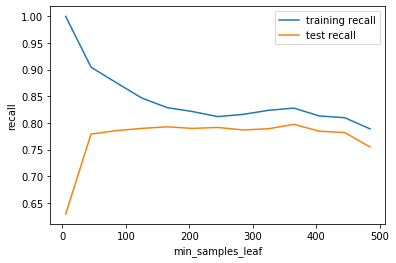

In [170]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("recall")
plt.legend()
plt.show()

In [171]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(5, 2000, 200)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight={0:0.1, 1: 0.9}, random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_gr

In [172]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.430878,0.188082,0.024021,0.002048,5,{'min_samples_split': 5},0.451327,0.454867,0.474336,0.460177,0.010116,10,1.000000,1.000000,1.000000,1.000000,0.000000
1,2.193197,0.137223,0.020370,0.002836,205,{'min_samples_split': 205},0.775221,0.743363,0.789381,0.769322,0.019244,6,0.896460,0.894690,0.915044,0.902065,0.009206
2,2.083659,0.175943,0.019245,0.003477,405,{'min_samples_split': 405},0.762832,0.768142,0.805310,0.778761,0.018897,5,0.845133,0.837168,0.843363,0.841888,0.003415
3,1.964118,0.197613,0.021282,0.003735,605,{'min_samples_split': 605},0.801770,0.782301,0.819469,0.801180,0.015180,3,0.861062,0.834513,0.838938,0.844838,0.011614
4,1.926201,0.192641,0.021321,0.003791,805,{'min_samples_split': 805},0.826549,0.782301,0.835398,0.814749,0.023227,2,0.873451,0.834513,0.853097,0.853687,0.015902


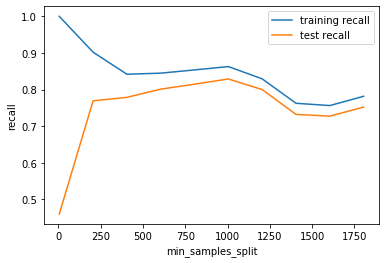

In [173]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("recall")
plt.legend()
plt.show()

In [174]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(2, 6, 1),
    'min_samples_leaf': range(100, 600, 100),
    'min_samples_split': range(900, 1200, 100), 
    'criterion': ["gini"]}

n_folds = 3

# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state= 100, class_weight={0:0.1, 1: 0.9})
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, scoring="recall", return_train_score=True, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  2.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_gr

In [175]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.396252,0.020581,0.022140,0.001510,gini,2,100,900,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.778761,0.775221,0.784071,0.779351,0.003637,25,0.8,0.789381,0.773451,0.787611,0.01091
1,0.416621,0.001181,0.020093,0.004313,gini,2,100,1000,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.778761,0.775221,0.784071,0.779351,0.003637,25,0.8,0.789381,0.773451,0.787611,0.01091
2,0.406295,0.010618,0.018597,0.003116,gini,2,100,1100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.778761,0.775221,0.784071,0.779351,0.003637,25,0.8,0.789381,0.773451,0.787611,0.01091
3,0.399228,0.010469,0.017199,0.001660,gini,2,200,900,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.778761,0.775221,0.784071,0.779351,0.003637,25,0.8,0.789381,0.773451,0.787611,0.01091
4,0.404408,0.011872,0.018913,0.001709,gini,2,200,1000,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.778761,0.775221,0.784071,0.779351,0.003637,25,0.8,0.789381,0.773451,0.787611,0.01091


In [176]:
# printing the optimal recall score and hyperparameters
print("best recall", grid_search.best_score_)
print(grid_search.best_estimator_)

best recall 0.8253687315634218
DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.1, 1: 0.9},
                       criterion='gini', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=1000, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=100, splitter='best')


In [177]:
# building the Tree model with optimum hyperparameters as per the findings above

model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.1, 1: 0.9},
                       criterion='gini', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=1000, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=100, splitter='best')
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.1, 1: 0.9},
                       criterion='gini', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=1000, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=100, splitter='best')

In [178]:
# predicting y
y_pred = model.predict(X_test)

In [179]:
# Evaluating the metrics
# printing the metrics

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
confusion =confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n {confusion}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')

Accuracy Score: 0.8679035662704144
Confusion Matrix: 
 [[7254  996]
 [ 193  558]]
Area Under Curve: 0.8111410240890933
Recall score: 0.7430093209054593
Precision score: 0.3590733590733591


In [180]:
# putting features
features = list(X_train.columns[0:])
features

['onnet_mou_6',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'std_ic_t2

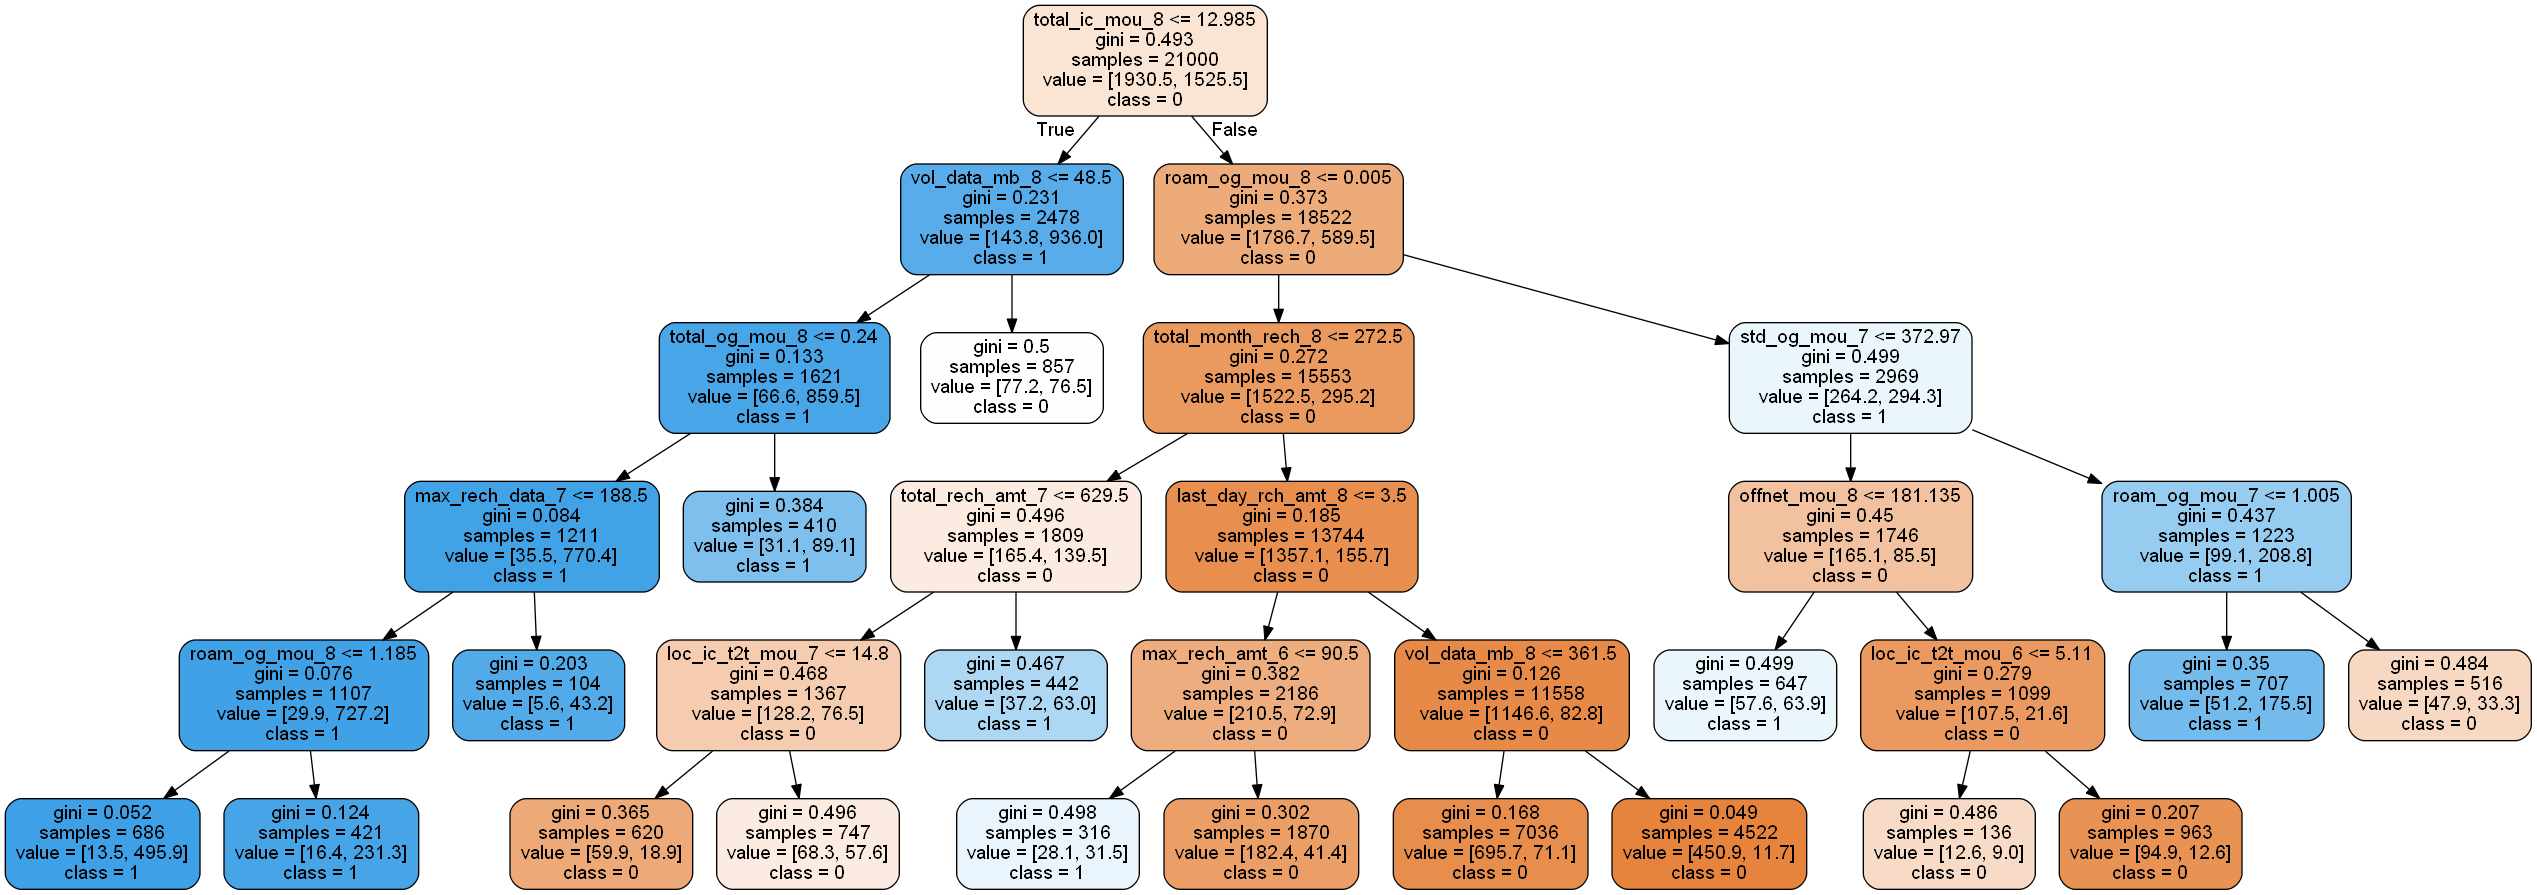

In [181]:
# Importing required packages for visualization
# plotting the tree
from sklearn.externals.six import StringIO 

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
dot_data = StringIO()  

export_graphviz(model, out_file=dot_data,feature_names=features,filled=True,rounded=True, class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

it is interesting to note that the class weights are impacting the values for different classes. Since we have given 0.9 weight to class 0 and 0.1 weight to class 1 the values per class are reduced in proportion. 
For the top node - 

value = [1930.5, 1525.5]; this indicates that weighted average count of class 0 if 1930.5 and class 1 is 1525.5. 
So, the actual counts will be - 

Class 0 = 19305 (~ 1930.5 / 0.1)
Class 1 = 1695  (~ 1525.5 / 0.9)

In [182]:
##### Analysis & Recommendations

#### Model Comparison

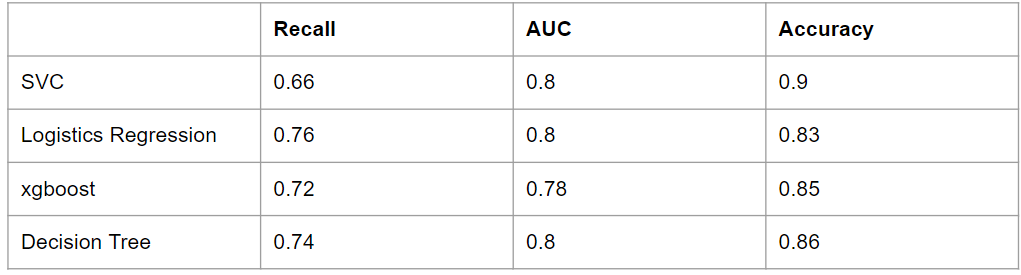


In [183]:
Conclusion - Logistics regression clearly seems to work better than all other models on the recall parameter 

SyntaxError: invalid syntax (<ipython-input-183-8286e9db9e3f>, line 1)

**Now lets examine this Tree model as this is built for interpretation purpose.. We have marked certain sections of this tree structure to highlight the key point.**

Approach - 
1. We have marked some of the class 1 Nodes / Leaves of the below Tree Model in the diagram below as 1,2, 3,4 .. 7. We have analyzed four nodes in detail and the other node markings are for the examples. Beyond 4 nodes the number of samples reduces significantly so it doesn't make sense to analyze and action them. 
2. We have also taken a note of the gini factors of these nodes / leaves. Lower gini scores indicate that a customer found in a particular sample is more likely to belong to a particular class (in this case - class1)
3. Through the analysis of four nodes, we are covering around - 1161.9 customer equivalents which is around 76% of the churn customers (as predicted by the model)
4. We also understand the count of customers can't be 1161.9. Here 1161.9 is appearing because we have added class weights to deal with the class imbalance problem.  


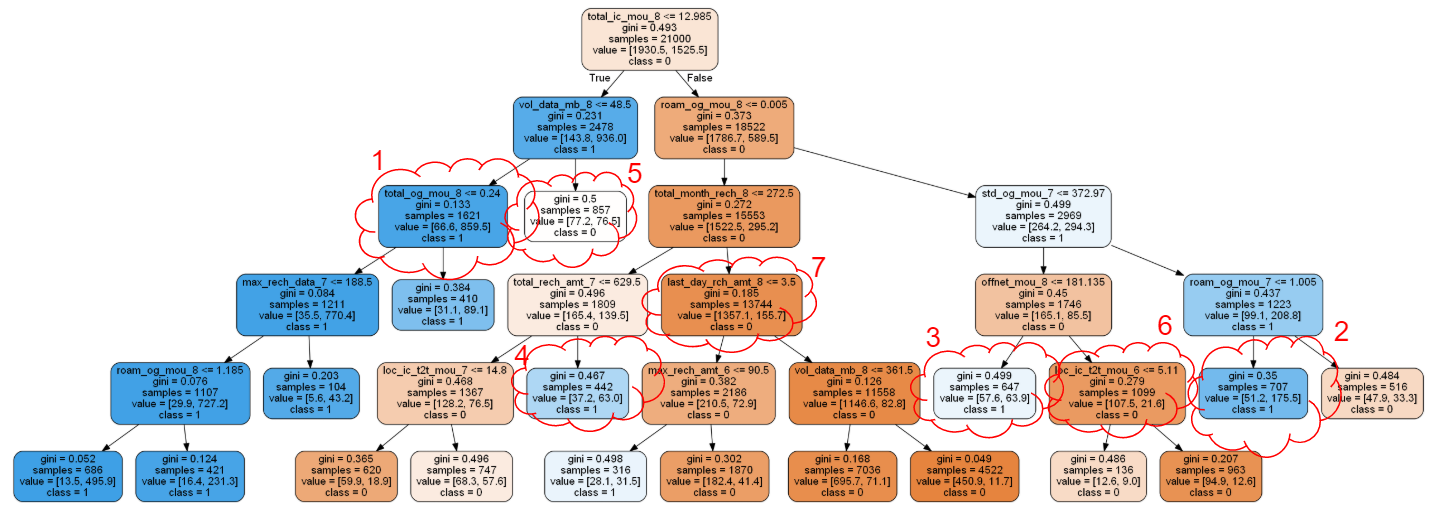

#### Let us analyze the 4 sections - marked as 1, 2, 3, and 4 in the above image to identify actions that can be taken to reduce churn

**Analysis of Node / Leaf marked as 1**- 

Two conditions need to be True to reach this node 
> condition 1 - total_ic_mou_8 <= 12.985, & <br>
> condition 2 - vol_data_mb_8 <= 48.5 <br>

So, customers who satisfy these two criteria will fall in the node marked as 1. 

**Our observations about node marked as 1** - 

> This node alone caters to 56% of all churn predictions
> This node also has very small gini score. So, any customer falling in the node is highly likely to churn. 
> All the downstream nodes also belong to class 1, with very small gini scores.

**Lead indicators of churn derived from analysis of this node and the downstream nodes** - 

    1. if max_rech_data_7 <= 188.5; the customer is very likely to churn. 
    2. if total_ic_mou and vol_data_mb has a downward trend immediately after month 7, the customer is highly likely to churn.
    3. To summarize, node marked as 1 is characterized by - reduced data usage, reduced incoming usage and reduced data recharge
    
**Recommendations** - 

    1. Handling reduced data usage / data recharge -  In India, in 2008, monthly recharge was needed to use Data. For incoming continuity no such recharge was needed. So, telecom company should note the delay in renewal of Data recharges and push plans to hook the customer through a better data plan more suited for his / her needs.  
    
    2. Handling lower incoming usage - Telecom company should identify the reason for lower incoming usage - roaming may be one reason for reduced incoming usage as incoming was chargeable in 2008. If roaming is not the reason for reduced incoming usage, telecom firm should try to push better data services and move the customer to node 5 (see diagram above). Telecom firms can also possibly reduce the rates for inner circle calls in certain cases to push for higher incoming usage. Higher incoming usage will mean that less and less customer will fall on the left half of the tree drawn in the diagram above.

**Analysis of Node / Leaf marked as 2**- 

four conditions need to be True to reach this node
> condition 1 - total_ic_mou_8 > 12.985,
> condition 2 - roam_og_mou_8 > 0.005,
> condition 3 - std_og_mou_7 > 372.97, &
> condition 4 - roam_og_mou_7 < 1.005

So, customers who satisfy these four criteria will fall in the node marked as 2. 

**Our observations about node marked as 2** - 

> This node alone caters to 12% of all churn predictions
> This node also has moderately low gini score. So, any customer falling in the node is likely to churn. 

**Lead indicators of churn derived from analysis of this node ** - 

    1. if roam_og_mou_7 < 1.005 & std_og_mou_7 > 372.97; the customer is very likely to churn. 
    2. if total_ic_mou and roam_og_mou has a upward trend immediately after month 7, the customer is highly likely to churn.
    3. To summarize, node marked as 2 is characterized by - higher incoming and std minutes of usage, and higher outgoing minutes of usage while roaming. All these are costly services. 
    
**Recommendations** - 

    1. Higher usage of costly services looks like an attempt to exhaust the prepaid balance, so that customer can change the plan post consuming the balance. 
    2. Selling long term value added services can pre-empt these customers from trying to move away. Even if there is no balance, customer could avail a value add service for a longer time. And, the value customers see in these value added service can convince them to stay on with the telecom operating firm.  

**Analysis of Node / Leaf marked as 3**- 

four conditions need to be True to reach this node
> condition 1 - total_ic_mou_8 > 12.985, <br>
> condition 2 - roam_og_mou_8 > 0.005, <br>
> condition 3 - std_og_mou_7 <= 372.97, & <br>
> condition 4 - offnet_mou_8 <= 181.35 <br>

So, customers who satisfy these four criteria will fall in the node marked as 3. 

**Our observations about node marked as 3** - 

> This node alone caters to 4% of all churn predictions
> Gini score for this node is moderately high. So, any customer falling in the node is slightly likely (~50% probability) to churn. 

**Lead indicators of churn derived from analysis of this node ** - 

> Lower offnet minutes of usage after month-7 might be a good early indicator of churn 
> This node is characterized by lower std outgoing, lower offnet, and higher incoming minutes of usage
    
**Recommendations** - 
 
    1. Telecom firm should try to move users towards node 6, the one with higher offnet minutes of usage (offnet_mou_8 > 181.35) through promotions or discounted rates. Node 6 is marked in the diagram above.   

**Analysis of Node / Leaf marked as 4**- 

four conditions need to be True to reach this node
> condition 1 - total_ic_mou_8 > 12.985, <br>
> condition 2 - roam_og_mou_8 <= 0.005, <br>
> condition 3 - total_month_rech_8 <= 272.5, & <br>
> condition 4 - total_rech_amt_7 > 629.5 <br>

So, customers who satisfy these four criteria will fall in the node marked as 4. 

**Our observations about node marked as 4** - 

> This node alone caters to 4% of all churn predictions
> Gini score for this node is moderately high. So, any customer falling in the node is slightly likely (~50% probability) to churn. 

**Lead indicators of churn derived from analysis of this node ** - 

> This node is characterized by lower 8th month recharge, higher 7th month recharge, and higher incoming minutes of usage
    
**Recommendations** - 
 
    1. Customer reduced the monthly recharge by a 3rd in a span of a month. The node sample size is significant ~442 samples. Customer clearly lowered the usage of services availed. Telecom operator need to engage the customers and manage the perception about the value delivered. Advertisement can be a good way for pereption handling with taglines aligned to the value drivers of this segment such as fastest internet, most reliable services etc.  If customer is convinced to not lower the usage in month 8 than most of these customers will land on Node marked as 7 (see diagram above)